# Predicting athlete’s award using Age, Height, Weight, Region

data from: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/version/2#_=_

In [165]:
#Import libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import seaborn as sb
sb.set() # set the default Seaborn style for graphics

import plotly.offline as py
import warnings

import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn import naive_bayes


In [166]:
athletedata=pd.read_csv('athlete_events.csv')
nocdata=pd.read_csv('noc_regions.csv')

In [167]:
nocdata.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [168]:
nocdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
NOC       230 non-null object
region    227 non-null object
notes     21 non-null object
dtypes: object(3)
memory usage: 5.5+ KB


In [169]:
print(athletedata.shape)
print(nocdata.shape)

(271116, 15)
(230, 3)


In [170]:
print(athletedata.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


Note: Age, Height, Weight and Medal have null value, we need to clean it.

In [171]:
athletedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [172]:
athletedata.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [173]:
# Extract only the numeric data variables
numDF = pd.DataFrame(athletedata[["Age", "Height", "Weight"]])

# Summary Statistics for all Variables
numDF.describe()

,Age,Height,Weight
count,261642.000000,210945.000000,208241.000000
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


# Clean Dataset

In [174]:
# Create a copy of the Dataset
atheleteClean = athletedata.copy()

#fill NA in medal with 'No Medal'
atheleteClean['Medal'].fillna('No Medal', inplace=True)

#atheleteClean['Medal2'] = atheleteClean['Medal']
#atheleteClean.loc[atheleteClean['Medal2'] == 'Gold', ['Medal2']] = 'Medal'
#atheleteClean.loc[atheleteClean['Medal2'] == 'Silver', ['Medal2']] = 'Medal'
#atheleteClean.loc[atheleteClean['Medal2'] == 'Bronze', ['Medal2']] = 'Medal'

#drop row if any of Age, Weight, Height is na
atheleteClean.dropna(inplace=True)

#reset index
atheleteClean.reset_index(drop=True, inplace=True)

In [175]:
atheleteClean.shape

(206165, 15)

In [176]:
print(atheleteClean.isnull().sum())

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64


### Merge atheleteClean and nocdata to get region

In [177]:
# merging
atheletenocClean = atheleteClean.merge(nocdata,
                                left_on = 'NOC',
                                right_on = 'NOC',
                                how = 'left')

In [178]:
# Check NOCs that didnt have a matching country
atheletenocClean.loc[atheletenocClean['region'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team
2046,SGP,Singapore
4805,ROT,Refugee Olympic Athletes
33458,SGP,June Climene
48211,TUV,Tuvalu
72856,SGP,Rika II
81401,SGP,Singapore-2
179166,SGP,Singapore-1


In [179]:
# Replace missing region
atheletenocClean['region'] = np.where(atheletenocClean['NOC']=='SGP', 'Singapore', atheletenocClean['region'])
atheletenocClean['region'] = np.where(atheletenocClean['NOC']=='ROT', 'Refugee Olympic Athletes', atheletenocClean['region'])
atheletenocClean['region'] = np.where(atheletenocClean['NOC']=='TUV', 'Tuvalu', atheletenocClean['region'])

#drop duplicates
atheletenocClean.drop_duplicates(inplace=True,keep='first')

atheletenocClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206152 entries, 0 to 206164
Data columns (total 17 columns):
ID        206152 non-null int64
Name      206152 non-null object
Sex       206152 non-null object
Age       206152 non-null float64
Height    206152 non-null float64
Weight    206152 non-null float64
Team      206152 non-null object
NOC       206152 non-null object
Games     206152 non-null object
Year      206152 non-null int64
Season    206152 non-null object
City      206152 non-null object
Sport     206152 non-null object
Event     206152 non-null object
Medal     206152 non-null object
region    206152 non-null object
notes     3493 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 28.3+ MB


In [180]:
#drop un-needed cols
atheletenocClean = atheletenocClean.drop(columns="Team")
atheletenocClean = atheletenocClean.drop(columns="NOC")
atheletenocClean = atheletenocClean.drop(columns="City")
atheletenocClean = atheletenocClean.drop(columns="notes")
atheletenocClean = atheletenocClean.drop(columns="Name")

In [181]:
atheletenocClean.shape

(206152, 12)

In [182]:
atheletenocClean.head()

,ID,Sex,Age,Height,Weight,Games,Year,Season,Sport,Event,Medal,region
0,1,M,24.0,180.0,80.0,1992 Summer,1992,Summer,Basketball,Basketball Men's Basketball,No Medal,China
1,2,M,23.0,170.0,60.0,2012 Summer,2012,Summer,Judo,Judo Men's Extra-Lightweight,No Medal,China
2,5,F,21.0,185.0,82.0,1988 Winter,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands
3,5,F,21.0,185.0,82.0,1988 Winter,1988,Winter,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,Netherlands
4,5,F,25.0,185.0,82.0,1992 Winter,1992,Winter,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands


# Basic Exploration

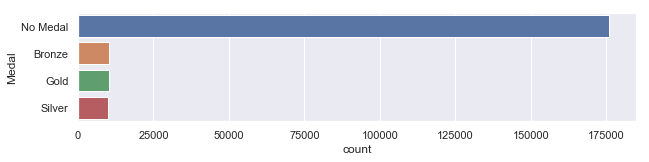

In [183]:
plt.figure(figsize=(10,2))
sb.countplot(y=atheletenocClean["Medal"])

In [142]:
# Extract Response and Predictors
y = pd.DataFrame(atheletenocClean['Medal'])
X = pd.DataFrame(atheletenocClean[["Age", "Height", "Weight"]])
#X = pd.DataFrame(atheletenocClean[["Games", "Year", "Season","Sport","Event","region"]])

y = y.astype('category')

In [143]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (154614, 1) (154614, 3)
Test Set  : (51538, 1) (51538, 3)


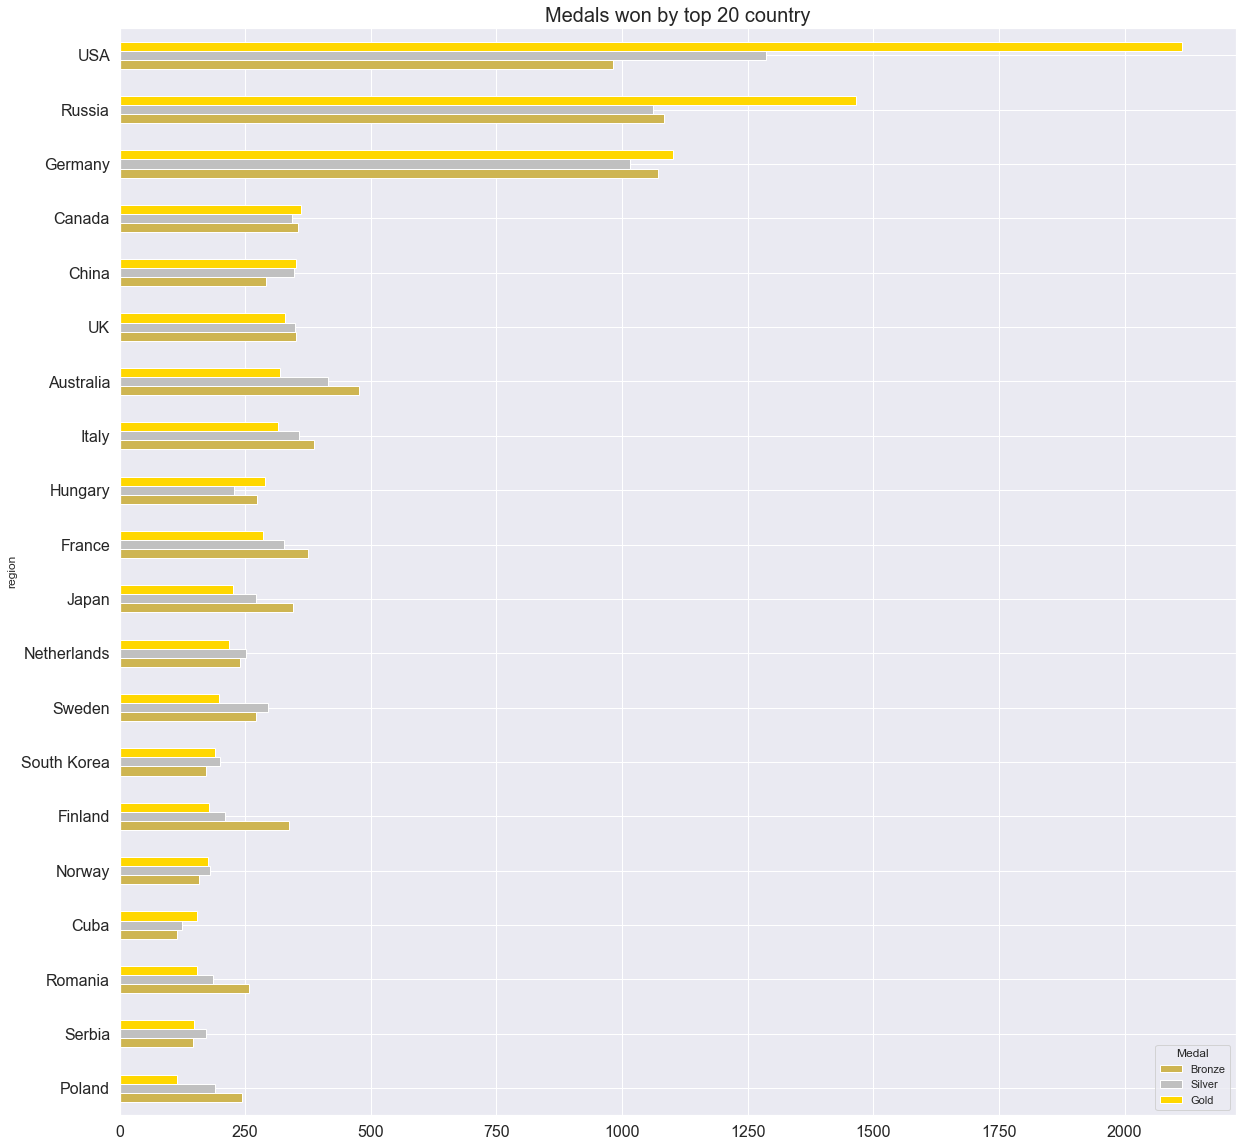

In [22]:
medals_countries=pd.crosstab(atheletenocClean['region'],atheletenocClean['Medal'])
medals_countries = medals_countries.drop(columns="No Medal")
medals_countries = medals_countries[['Bronze', 'Silver', 'Gold']]
medals_countries.sort_values(by=['Gold'], inplace=True)
medals_countries=medals_countries[-20:]

#Barplot for bronze,Gold and Silver medals for each country
#(Only for those countries which have atleast one medal in each category)
colors = ['#ceb552', 'silver', 'gold']

sns.set(rc={'figure.figsize':(20,20)})
set1=medals_countries.loc[medals_countries['Bronze'] >0 ]
set2=set1.loc[medals_countries['Silver'] >0 ]
set3=set2.loc[medals_countries['Gold'] >0 ]

plot4=set3.plot.barh(color=colors, fontsize=16)
plot4.set_title('Medals won by top 20 country', fontsize=20)
plt.show()

In [23]:
# Summary Statistics for Predictors
X_train.describe()

,Age,Height,Weight
count,154614.000000,154614.000000,154614.000000
mean,25.043851,175.374662,70.679204
std,5.469135,10.543666,14.310677
min,11.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,71.000000,226.000000,214.000000


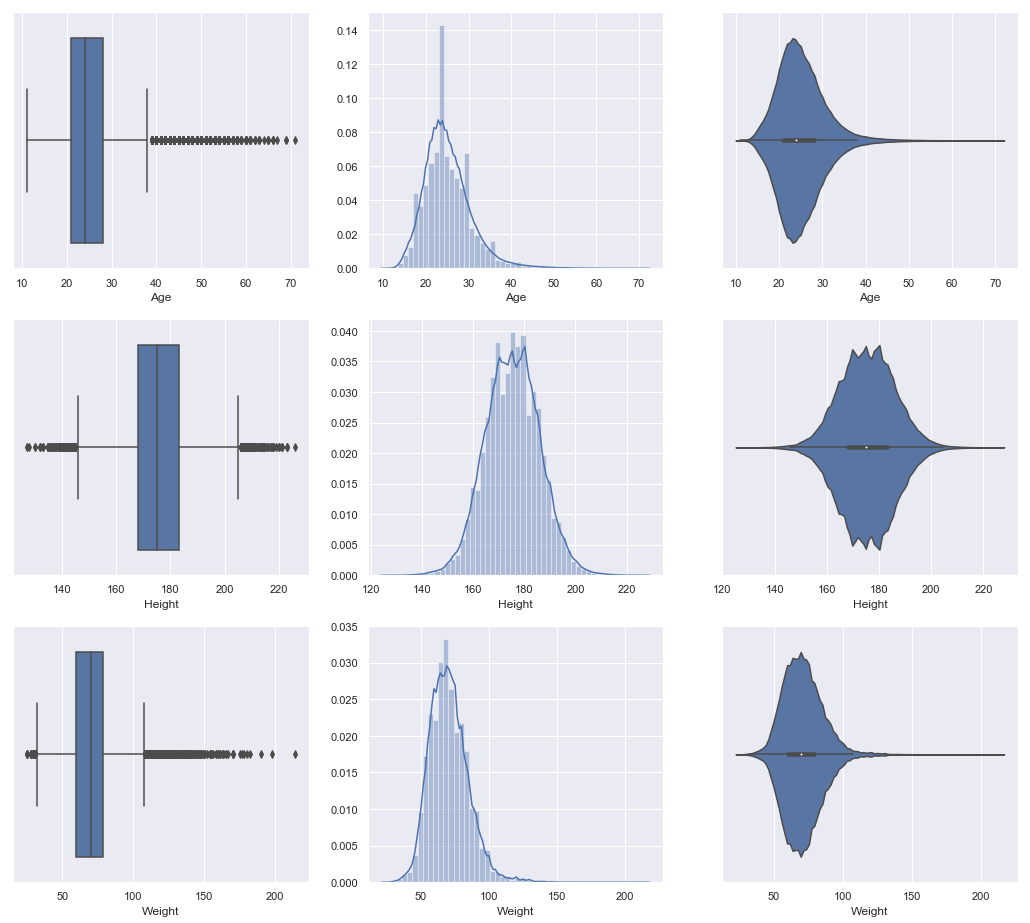

In [24]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(3, 3, figsize=(18, 16))

count = 0
for var in X_train:
    sb.boxplot(X_train[var], orient = "h", ax = axes[count,0])
    sb.distplot(X_train[var], ax = axes[count,1])
    sb.violinplot(X_train[var], ax = axes[count,2])
    count += 1

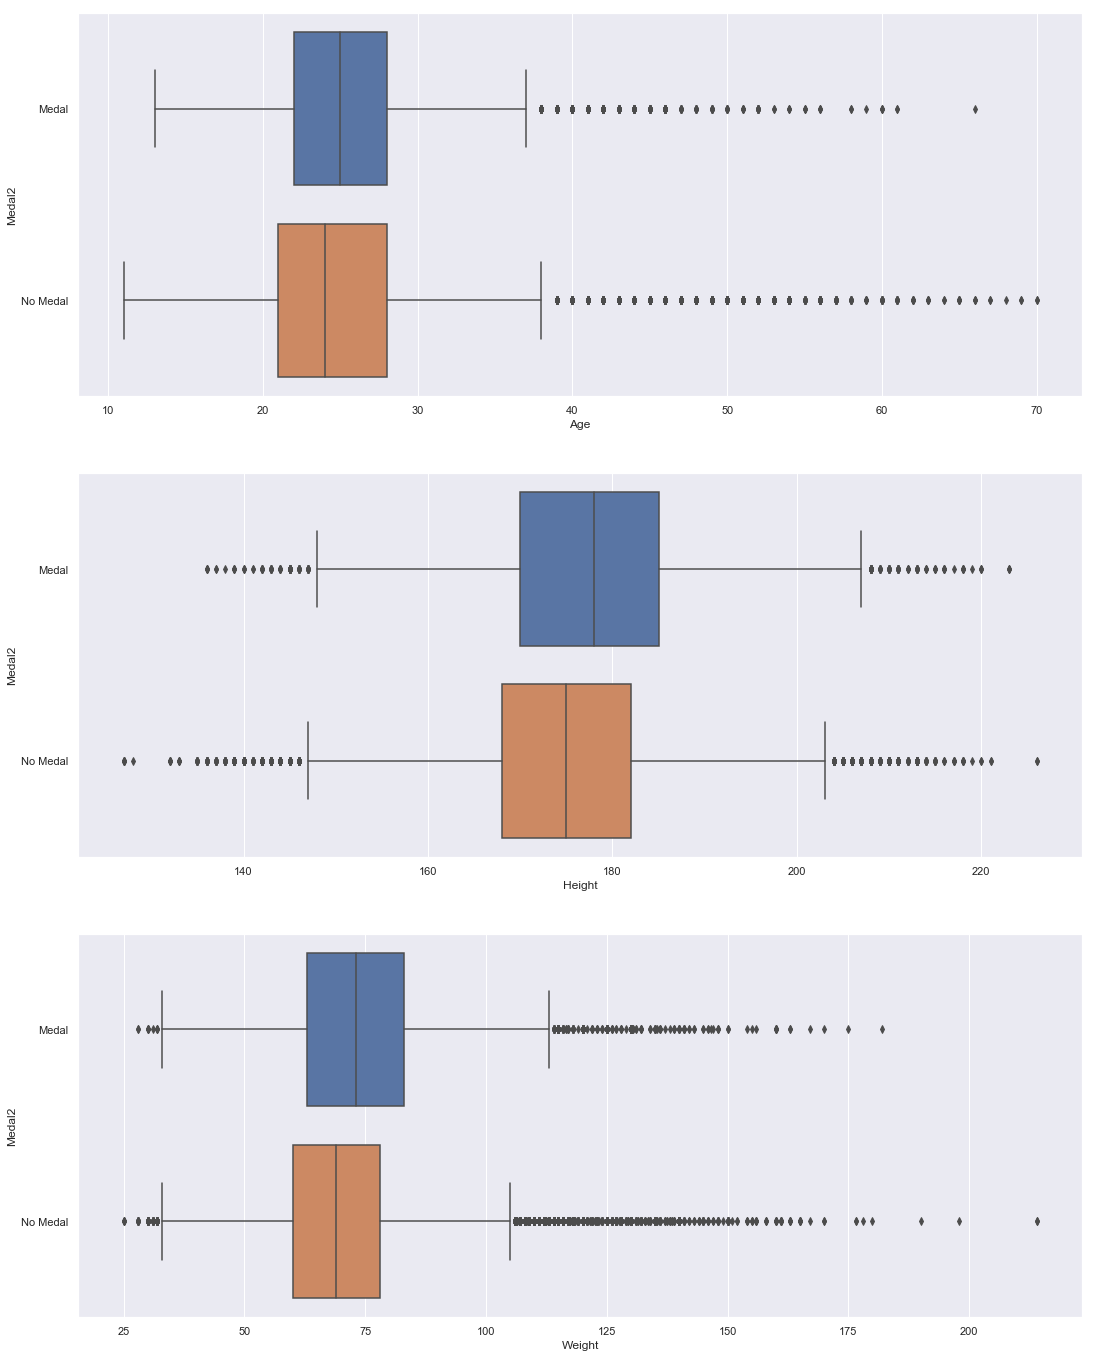

In [115]:
# Relationship between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1, join_axes = [y_train.index])

f, axes = plt.subplots(3, 1, figsize=(18, 24))

count = 0
for var in X_train:
    sb.boxplot(x = var, y = "Medal", data = trainDF, orient = "h", ax = axes[count])
    count += 1

In [26]:
##swarm plots




In [27]:
tmp = atheletenocClean.groupby(['Sport'])['Height', 'Weight'].agg('mean')
df1 = pd.DataFrame(tmp).reset_index()
tmp = atheletenocClean.groupby(['Sport'])['ID'].count()

df2 = pd.DataFrame(tmp).reset_index()
dataset = df1.merge(df2) #DataFrame with columns 'Sport', 'Height', 'Weight', 'ID'

scatterplots = list()
for sport in dataset['Sport']:
    df = dataset[dataset['Sport']==sport]
    trace = go.Scatter(
        x = df['Height'],
        y = df['Weight'],
        name = sport,
        marker=dict(
            symbol='circle',
            sizemode='area',
            sizeref=10,
            size=df['ID'])
    )
    scatterplots.append(trace)
                         
layout = go.Layout(title='Mean height and weight by sport', 
                   xaxis=dict(title='Height, cm'), 
                   yaxis=dict(title='Weight, kg'),
                   showlegend=True)

fig = dict(data = scatterplots, layout = layout)
py.iplot(fig)

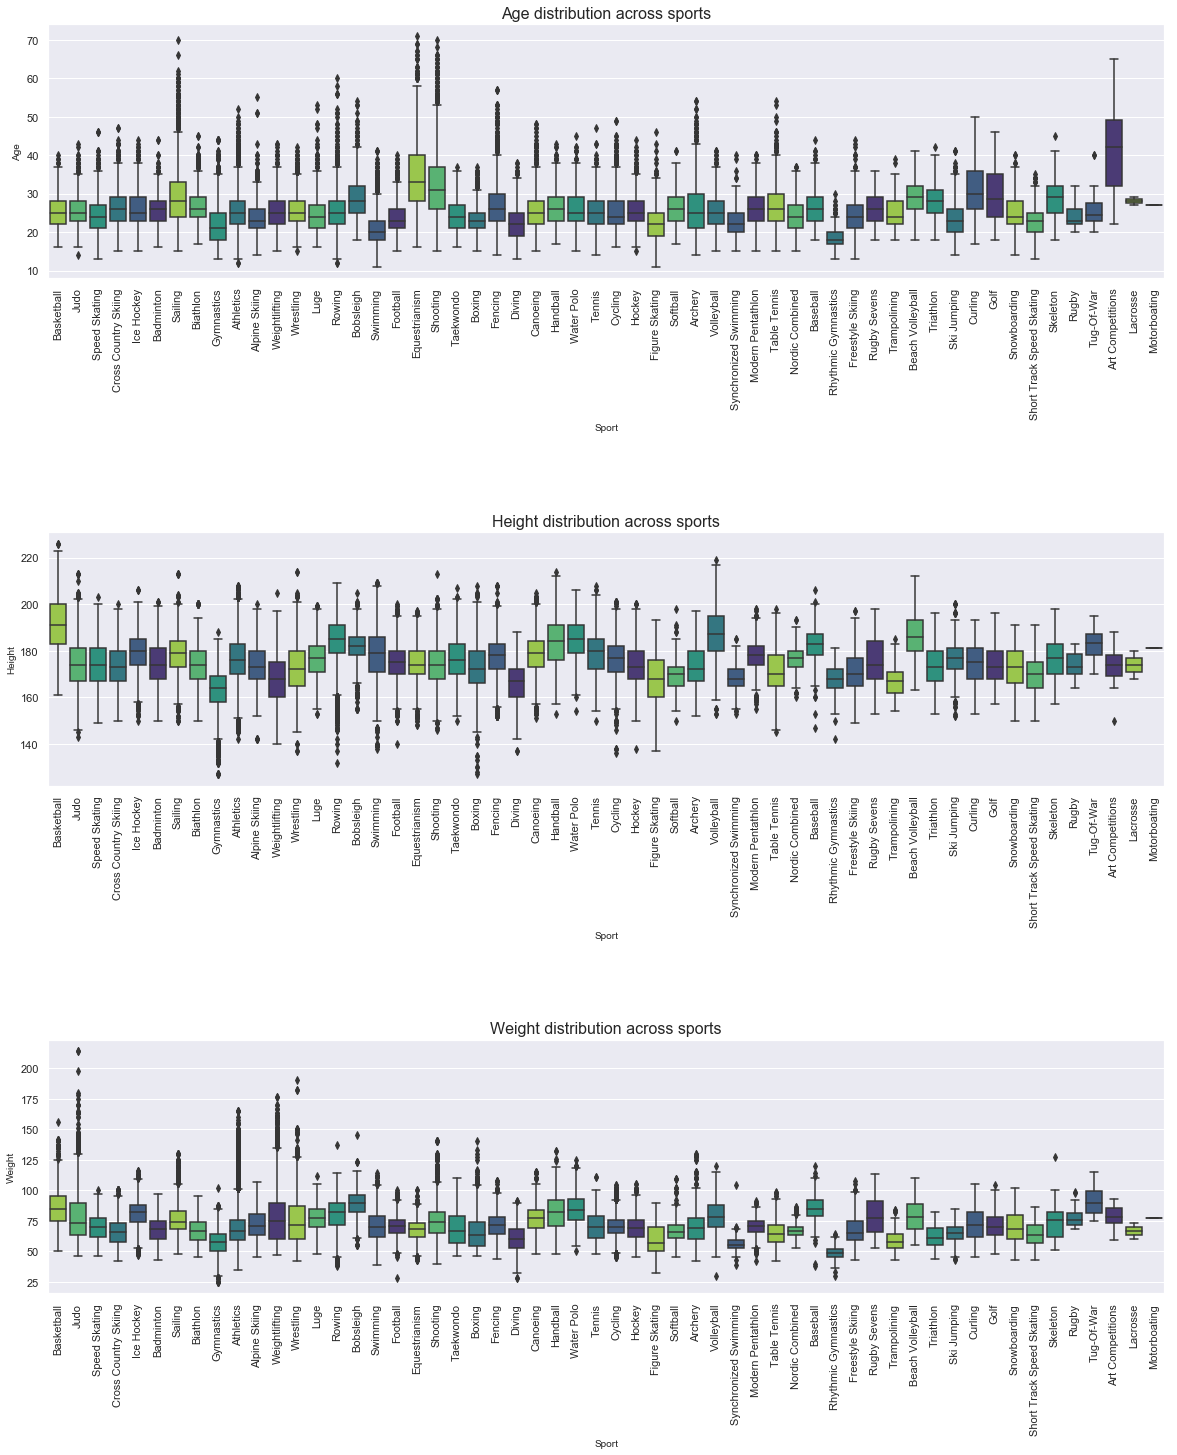

In [28]:
plt.figure(figsize=(20,15))
plt.subplot(311)
ax=sns.boxplot(x='Sport',y='Age',data=atheletenocClean,palette=sns.color_palette(palette='viridis_r'))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Sport',fontsize=10)
ax.set_ylabel('Age',fontsize=10)
ax.set_title('Age distribution across sports',fontsize=16)
plt.subplot(312)
ax=sns.boxplot(x='Sport',y='Height',data=atheletenocClean,palette=sns.color_palette(palette='viridis_r'))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Sport',fontsize=10)
ax.set_ylabel('Height',fontsize=10)
ax.set_title('Height distribution across sports',fontsize=16)
plt.subplot(313)
ax=sns.boxplot(x='Sport',y='Weight',data=atheletenocClean,palette=sns.color_palette(palette='viridis_r'))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Sport',fontsize=10)
ax.set_ylabel('Weight',fontsize=10)
ax.set_title('Weight distribution across sports',fontsize=16)
plt.subplots_adjust(wspace = 1, hspace = 1,top = 1.3)

Text(449.73636363636354, 0.5, 'Predicted')

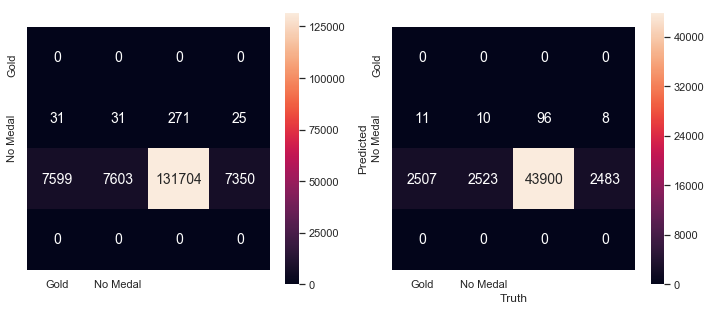

In [29]:
f, axes = plt.subplots(1, 2, figsize=(12, 5))


# Init the Gaussian Classifier
model = naive_bayes.GaussianNB()

# Train the model 
model.fit(X_train, y_train)


train_pred = model.predict(X_train)

# Plot Confusion Matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(train_pred, y_train)
names = np.unique(train_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=names, yticklabels=names, annot_kws={"size": 14}, ax = axes[0])
plt.xlabel('Truth')
plt.ylabel('Predicted')




# Predict Output 
test_pred = model.predict(X_test)

# Plot Confusion Matrix
mat = confusion_matrix(test_pred, y_test)
names = np.unique(train_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=names, yticklabels=names, annot_kws={"size": 14}, ax = axes[1])
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [30]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8669331367146571

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8303775854709147



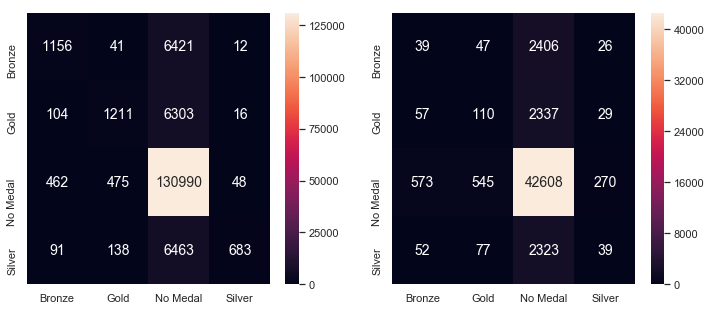

In [31]:


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()



# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 5))

names = np.unique(y_train_pred)
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           xticklabels=names, yticklabels=names, annot = True, fmt=".0f", annot_kws={"size": 14}, ax = axes[0])

names = np.unique(y_test_pred)
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           xticklabels=names, yticklabels=names, annot = True, fmt=".0f", annot_kws={"size": 14}, ax = axes[1])

In [87]:
test = atheletenocClean.copy()
test = test.astype({"Medal": 'category'})
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206152 entries, 0 to 206164
Data columns (total 12 columns):
ID        206152 non-null int64
Sex       206152 non-null object
Age       206152 non-null float64
Height    206152 non-null float64
Weight    206152 non-null float64
Games     206152 non-null object
Year      206152 non-null int64
Season    206152 non-null object
Sport     206152 non-null object
Event     206152 non-null object
Medal     206152 non-null category
region    206152 non-null object
dtypes: category(1), float64(3), int64(2), object(6)
memory usage: 19.1+ MB


In [88]:
no = test.loc[test['Medal'] == 'No Medal']
no.shape

(175971, 12)

In [89]:
no = no.sample(30000)
no.shape

(30000, 12)

In [72]:
medal = test.loc[test['Medal'] != 'No Medal']
medal.shape

(30181, 12)

In [73]:
result = medal.append(no)
result.shape

(60181, 12)

In [90]:
# Extract Response and Predictors
y = pd.DataFrame(result['Medal'])
X = pd.DataFrame(result[["Age", "Height", "Weight"]])
y = y.astype('category')

In [91]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (45135, 1) (45135, 3)
Test Set  : (15046, 1) (15046, 3)


In [92]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6258557660352276

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.4135982985511099



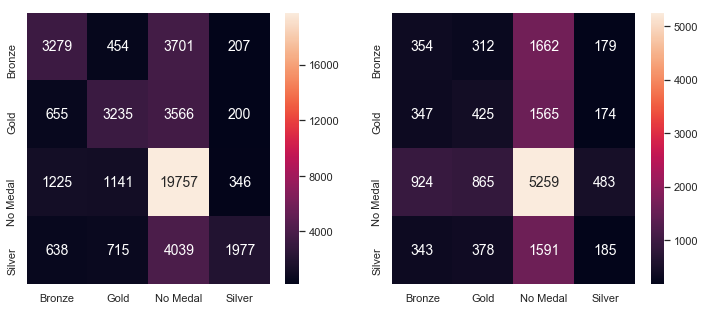

In [93]:


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()



# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 5))

names = np.unique(y_train_pred)
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           xticklabels=names, yticklabels=names, annot = True, fmt=".0f", annot_kws={"size": 14}, ax = axes[0])

names = np.unique(y_test_pred)
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           xticklabels=names, yticklabels=names, annot = True, fmt=".0f", annot_kws={"size": 14}, ax = axes[1])

Text(449.73636363636354, 0.5, 'Predicted')

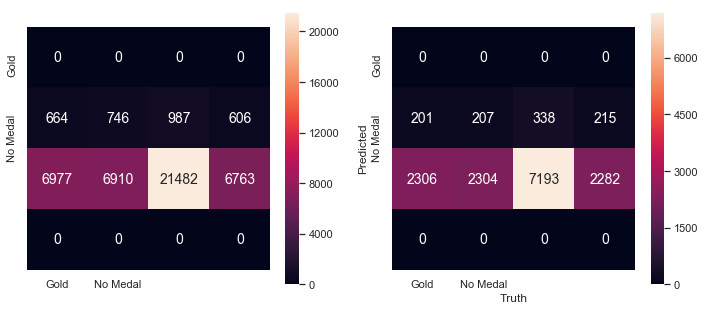

In [94]:
f, axes = plt.subplots(1, 2, figsize=(12, 5))


# Init the Gaussian Classifier
model = naive_bayes.GaussianNB()

# Train the model 
model.fit(X_train, y_train)


train_pred = model.predict(X_train)

# Plot Confusion Matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(train_pred, y_train)
names = np.unique(train_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=names, yticklabels=names, annot_kws={"size": 14}, ax = axes[0])
plt.xlabel('Truth')
plt.ylabel('Predicted')




# Predict Output 
test_pred = model.predict(X_test)

# Plot Confusion Matrix
mat = confusion_matrix(test_pred, y_test)
names = np.unique(train_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=names, yticklabels=names, annot_kws={"size": 14}, ax = axes[1])
plt.xlabel('Truth')
plt.ylabel('Predicted')